In [3]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'}
from IPython.display import clear_output # clear_output() 으로 아웃풋 제거 가능

#  텐서플로우 튜토리얼 - 딥러닝 도구들1
- 튜토리얼을 제공하는 깃헙https://github.com/golbin/TensorFlow-Tutorials

## 목차
- MNIST (손글씨 숫자 인식)
- CNN (이미지처리)
    - layers 패키지로 재구성 및 코드비교
- Autoencoder (비지도학습)

## MNIST
- 머신러닝 학습의 Hello World 와 같은 MNIST(손글씨 숫자 인식) 문제를 신경망으로 풀어봅니다.
- 과적합 방지 기법 중 하나인 Dropout 을 사용해봅니다.

신경망 모델 구성중...
학습 시작!
Epoch: 0003 Avg. cost = 0.112
Epoch: 0006 Avg. cost = 0.059
Epoch: 0009 Avg. cost = 0.041
Epoch: 0012 Avg. cost = 0.032
Epoch: 0015 Avg. cost = 0.025
Epoch: 0018 Avg. cost = 0.020
Epoch: 0021 Avg. cost = 0.022
Epoch: 0024 Avg. cost = 0.015
Epoch: 0027 Avg. cost = 0.016
Epoch: 0030 Avg. cost = 0.015

최적화 완료!
정확도: 0.9829


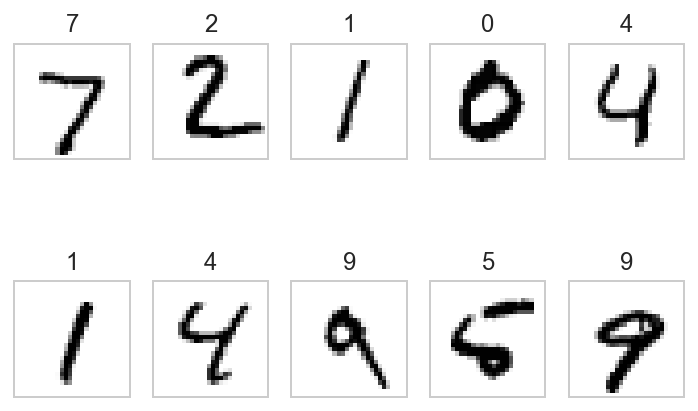

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
# 텐서플로우에 기본 내장된 mnist 모듈을 이용하여 데이터를 로드합니다.
# 지정한 폴더에 MNIST 데이터가 없는 경우 자동으로 데이터를 다운로드합니다.
# one_hot 옵션은 레이블을 동물 분류 예제에서 보았던 one_hot 방식의 데이터로 만들어줍니다.
print("mnist예제 받는중" ,end='\r')
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)
clear_output()
print("신경망 모델 구성중...")
#########=====================
# 신경망 모델 구성
######

# 입력 값의 차원은 [배치크기, 특성값] 으로 되어 있습니다.
# 손글씨 이미지는 28x28 픽셀로 이루어져 있고, 이를 784개의 특성값으로 정합니다.
X = tf.placeholder(tf.float32, [None, 784])
# 결과값은 0~9까지 값을 가짐
Y = tf.placeholder(tf.float32, [None,10])

keep_prob = tf.placeholder(tf.float32) # dropout에 사용

# 신경망의 레이어는 다음처럼 구성합니다.
# 784(입력 특성값)
#   -> 256 (히든레이어 뉴런 갯수) -> 256 (히든레이어 뉴런 갯수)
#   -> 10 (결과값 0~9 분류)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
# 입력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L1 = tf.nn.relu(tf.matmul(X, W1))
# 텐서플로우에 내장된 함수를 이용하여 dropout 을 적용합니다.
# 함수에 적용할 레이어와 확률만 넣어주면 됩니다. 겁나 매직!!
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
# L1 레이어의 출력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
# 최종 모델의 출력값은 W3 변수를 곱해 10개의 분류를 가지게 됩니다.
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)


print("학습 시작!")

#########======================
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0

    for i in range(total_batch):
        # 텐서플로우의 mnist 모델의 next_batch 함수를 이용해
        # 지정한 크기만큼 학습할 데이터를 가져옵니다.
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys,
                                                            keep_prob:0.8})
        total_cost += cost_val
        
    if (epoch+1) % 3 == 0:
        print('Epoch:', '%04d' % (epoch + 1),
              'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
    else : 
        print('Epoch:', '%04d' % (epoch + 1),
              'Avg. cost =', '{:.3f}'.format(total_cost / total_batch), end='\r')

print('\n최적화 완료!')

#########===========================
# 결과 확인
######
# model 로 예측한 값과 실제 레이블인 Y의 값을 비교합니다.
# tf.argmax 함수를 이용해 예측한 값에서 가장 큰 값을 예측한 레이블이라고 평가합니다.
# 예) [0.1 0 0 0.7 0 0.2 0 0 0 0] -> 3
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels,
                                  keep_prob:1}))



#########
# 결과 확인 (matplot)
######
labels = sess.run(model,
                  feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels,
                             keep_prob: 1})

fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                   cmap=plt.cm.gray_r)

plt.show()

## CNN
- 이미지 처리 분야에서 가장 유명한 신경망 모델인 CNN 을 이용하여 더 높은 인식률을 만들어봅니다.

In [8]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

print("mnist예제 받는중" ,end='\r')
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)
clear_output()
print("신경망 모델 구성중...", end="\r")

#########===============================
# 신경망 모델 구성
######

# 기존 모델에서는 입력 값을 28x28 하나의 차원으로 구성하였으나,
# CNN 모델을 사용하기 위해 2차원 평면과 특성치의 형태를 갖는 구조로 만듭니다.
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

# 각각의 변수와 레이어는 다음과 같은 형태로 구성됩니다.
# W1 [3 3 1 32] -> [3 3]: 커널 크기, 1: 입력값 X 의 특성수, 32: 필터 갯수
# L1 Conv shape=(?, 28, 28, 32)
#    Pool     ->(?, 14, 14, 32)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
# tf.nn.conv2d 를 이용해 한칸씩 움직이는 컨볼루션 레이어를 쉽게 만들 수 있습니다.
# padding='SAME' 은 커널 슬라이딩시 최외곽에서 한칸 밖으로 더 움직이는 옵션
L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
# Pooling 역시 tf.nn.max_pool 을 이용하여 쉽게 구성할 수 있습니다.
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# L1 = tf.nn.dropout(L1, keep_prob)

# L2 Conv shape=(?, 14, 14, 64)
#    Pool     ->(?, 7, 7, 64)
# W2 의 [3, 3, 32, 64] 에서 32 는 L1 에서 출력된 W1 의 마지막 차원, 필터의 크기 입니다.
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# L2 = tf.nn.dropout(L2, keep_prob)

# FC 레이어: 입력값 7x7x64 -> 출력값 256
# Full connect를 위해 직전의 Pool 사이즈인 (?, 7, 7, 64) 를 참고하여 차원을 줄여줍니다.
#    Reshape  ->(?, 256)
W3 = tf.Variable(tf.random_normal([7 * 7 * 64, 256], stddev=0.01))
L3 = tf.reshape(L2, [-1, 7 * 7 * 64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob)

# 최종 출력값 L3 에서의 출력 256개를 입력값으로 받아서 0~9 레이블인 10개의 출력값을 만듭니다.
W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L3, W4)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
# 최적화 함수를 RMSPropOptimizer 로 바꿔서 결과를 확인해봅시다.
# optimizer = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
print("학습시작!")

#########================================
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # 이미지 데이터를 CNN 모델을 위한 자료형태인 [28 28 1] 의 형태로 재구성합니다.
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.7})
        total_cost += cost_val

    if (epoch+1) % 3 == 0:
        print('Epoch:', '%04d' % (epoch + 1),
              'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
    else : 
        print('Epoch:', '%04d' % (epoch + 1),
              'Avg. cost =', '{:.3f}'.format(total_cost / total_batch), end='\r')

print('\n최적화 완료!')


학습시작!델 구성중...
Epoch: 0003 Avg. cost = 0.080
Epoch: 0006 Avg. cost = 0.044
Epoch: 0009 Avg. cost = 0.031
Epoch: 0012 Avg. cost = 0.023
Epoch: 0015 Avg. cost = 0.016

최적화 완료!


#### tensorflow.layers를 사용하여 더 쉽고 보기좋게 만들어보자
- 신경망 구성을 손쉽게 해 주는 유틸리티 모음인 tensorflow.layers 를 사용해봅니다.
- 위의 코드를 재구성한 것이니, 소스를 한 번 비교해보세요.
- 이처럼 TensorFlow 에는 간단하게 사용할 수 있는 다양한 함수와 유틸리티들이 매우 많이 마련되어 있습니다.


In [ ]:

import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])
is_training = tf.placeholder(tf.bool)

# 기본적으로 inputs, outputs size, kernel_size 만 넣어주면
# 활성화 함수 적용은 물론, 컨볼루션 신경망을 만들기 위한 나머지 수치들은 알아서 계산해줍니다.
# 특히 Weights 를 계산하는데 xavier_initializer 를 쓰고 있는 등,
# 크게 신경쓰지 않아도 일반적으로 효율적인 신경망을 만들어줍니다.
L1 = tf.layers.conv2d(X, 32, [3, 3], activation=tf.nn.relu)
L1 = tf.layers.max_pooling2d(L1, [2, 2], [2, 2])
L1 = tf.layers.dropout(L1, 0.7, is_training)

L2 = tf.layers.conv2d(L1, 64, [3, 3], activation=tf.nn.relu)
L2 = tf.layers.max_pooling2d(L2, [2, 2], [2, 2])
L2 = tf.layers.dropout(L2, 0.7, is_training)

L3 = tf.contrib.layers.flatten(L2)
L3 = tf.layers.dense(L3, 256, activation=tf.nn.relu)
L3 = tf.layers.dropout(L3, 0.5, is_training)

model = tf.layers.dense(L3, 10, activation=None)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          is_training: True})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images.reshape(-1, 28, 28, 1),
                                   Y: mnist.test.labels,
                                   is_training: False}))

## Autoencoder - 비지도학습
- 대표적인 비지도(Unsupervised) 학습 방법인 Autoencoder 를 구현해봅니다.

In [ ]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 옵션 설정
######
learning_rate = 0.01
training_epoch = 20
batch_size = 100
# 신경망 레이어 구성 옵션
n_hidden = 256  # 히든 레이어의 뉴런 갯수
n_input = 28*28   # 입력값 크기 - 이미지 픽셀수

#########
# 신경망 모델 구성
######
# Y 가 없습니다. 입력값을 Y로 사용하기 때문입니다.
X = tf.placeholder(tf.float32, [None, n_input])

# 인코더 레이어와 디코더 레이어의 가중치와 편향 변수를 설정합니다.
# 다음과 같이 이어지는 레이어를 구성하기 위한 값들 입니다.
# input -> encode -> decode -> output
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
# sigmoid 함수를 이용해 신경망 레이어를 구성합니다.
# sigmoid(X * W + b)
# 인코더 레이어 구성
encoder = tf.nn.sigmoid(
                tf.add(tf.matmul(X, W_encode), b_encode))

# encode 의 아웃풋 크기를 입력값보다 작은 크기로 만들어 정보를 압축하여 특성을 뽑아내고,
# decode 의 출력을 입력값과 동일한 크기를 갖도록하여 입력과 똑같은 아웃풋을 만들어 내도록 합니다.
# 히든 레이어의 구성과 특성치을 뽑아내는 알고리즘을 변경하여 다양한 오토인코더를 만들 수 있습니다.
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
# 디코더 레이어 구성
# 이 디코더가 최종 모델이 됩니다.
decoder = tf.nn.sigmoid(
                tf.add(tf.matmul(encoder, W_decode), b_decode))

# 디코더는 인풋과 최대한 같은 결과를 내야 하므로, 디코딩한 결과를 평가하기 위해
# 입력 값인 X 값을 평가를 위한 실측 결과 값으로하여 decoder 와의 차이를 손실값으로 설정합니다.
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
# 입력값(위쪽)과 모델이 생성한 값(아래쪽)을 시각적으로 비교해봅니다.
######
sample_size = 10

samples = sess.run(decoder,
                   feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()